In [1]:
# Run this cell if using colab
%cd /content
!git clone https://github.com/Ziinc/nb-15-demo
%cd nb-15-demo
!pwd

/content
Cloning into 'nb-15-demo'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 20 (delta 2), reused 5 (delta 1), pack-reused 11
Unpacking objects: 100% (20/20), done.
/content/nb-15-demo
/content/nb-15-demo


In [2]:
!ls
!chmod u+x ./unpack
!./unpack
!ls

analysis.ipynb	data.partab  data.partad  unpack
data.partaa	data.partac  README.md
./data/NUSW-NB15_features.csv
./data/UNSW-NB15_1.csv
./data/UNSW-NB15_2.csv
./data/UNSW-NB15_3.csv
./data/UNSW-NB15_4.csv
./data/UNSW-NB15_LIST_EVENTS.csv
./data/UNSW_NB15_testing-set.csv
./data/UNSW_NB15_training-set.csv
analysis.ipynb	data.partaa  data.partac  data.tar.gz  unpack
data		data.partab  data.partad  README.md


# Data Cleaning

You can read about the features in the `./data/NUSW-NB15_features.csv` file

In [0]:
import pandas as pd
import numpy as np
headers_df = pd.read_csv("data/NUSW-NB15_features.csv", encoding= 'unicode_escape')
headers_df.head()
column_names = headers_df["Name"].tolist()

In [6]:
column_names

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [26]:
# we need to fix a typo with the ct_src_ltm column, as the dataset author had left a space in it
 clean_column_names = ["ct_src_ltm" if x=="ct_src_ ltm" else x for x in column_names]
 clean_column_names

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [55]:

data_files = [
"data/UNSW-NB15_1.csv",
"data/UNSW-NB15_2.csv",
"data/UNSW-NB15_3.csv",
"data/UNSW-NB15_4.csv"
]
df = pd.concat((pd.read_csv(f, names=clean_column_names) for f in data_files))

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0


In [59]:
df.describe

<bound method NDFrame.describe of                srcip  sport           dstip  ... ct_dst_src_ltm attack_cat Label
0         59.166.0.0   1390   149.171.126.6  ...              1        NaN     0
1         59.166.0.0  33661   149.171.126.9  ...              2        NaN     0
2         59.166.0.6   1464   149.171.126.7  ...              1        NaN     0
3         59.166.0.5   3593   149.171.126.5  ...              1        NaN     0
4         59.166.0.3  49664   149.171.126.0  ...              1        NaN     0
...              ...    ...             ...  ...            ...        ...   ...
440039    59.166.0.5  33094   149.171.126.7  ...              3        NaN     0
440040    59.166.0.7  20848   149.171.126.4  ...              2        NaN     0
440041    59.166.0.3  21511   149.171.126.9  ...              2        NaN     0
440042    59.166.0.9  35433   149.171.126.0  ...              2        NaN     0
440043  175.45.176.0  17293  149.171.126.17  ...              2   Exploits 

## Identifying columns to be used

In [0]:
binary_columns = ["is_sm_ips_ports", "is_ftp_login"]

In [0]:
continuous_column_names = ["ct_state_ttl", "ct_flw_http_mthd", "ct_ftp_cmd", "ct_srv_src", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm"]

In [0]:
label_columns = ["Label"]

In [0]:
# int for intermediate
df_int = df[binary_columns + continuous_column_names + label_columns]

### Combining and Dropping NaN values

In [67]:
df_int = df_int.dropna()
df_int.describe

<bound method NDFrame.describe of         is_sm_ips_ports  is_ftp_login  ...  ct_dst_src_ltm  Label
0                     0           0.0  ...               1      0
1                     0           0.0  ...               2      0
2                     0           0.0  ...               1      0
3                     0           0.0  ...               1      0
4                     0           0.0  ...               1      0
...                 ...           ...  ...             ...    ...
387197                0           0.0  ...               1      0
387198                0           0.0  ...               1      0
387199                0           0.0  ...               2      0
387200                0           0.0  ...               2      0
387201                0           0.0  ...               2      0

[1087203 rows x 12 columns]>

## Categorical Columns
Certain boolean columns are of interest to us.

### Converting IPs

In [68]:
# Checking the unique IP addresses
src_nodes = df.srcip.unique()
ds_nodes = df.dstip.unique()
np.count_nonzero(src_nodes), np.count_nonzero(ds_nodes)

(43, 47)

### Continuous Features of Interest
We will be selecting out specific columns to utilize.



```
ct_state_ttl	Integer	No. for each state (6) according to specific range of values for source/destination time to live (10) (11).
ct_flw_http_mthd	Integer	No. of flows that has methods such as Get and Post in http service.
ct_ftp_cmd	integer	No of flows that has a command in ftp session.
ct_srv_src	integer	No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26).
ct_srv_dst	integer	No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26).
ct_dst_ltm	integer	No. of connections of the same destination address (3) in 100 connections according to the last time (26).
ct_src_ ltm	integer	No. of connections of the same source address (1) in 100 connections according to the last time (26).
ct_src_dport_ltm	integer	No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26).
ct_dst_sport_ltm	integer	No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26).
ct_dst_src_ltm	integer	No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26).
```





### Type Conversions

In [69]:
# we clean up the ct_flw_http_mthd column before normalizing the continuous columns

df_int.ct_flw_http_mthd.unique()

array([ 0.,  1.,  2.,  4., 14.,  8.,  6., 12., 10.,  3.,  5., 36.,  9.])

In [70]:
df_no_na.ct_flw_http_mthd = df_no_na.ct_flw_http_mthd.apply(lambda x: int(x) if x != np.nan else 0  )

df_no_na.ct_flw_http_mthd.unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([ 0,  1,  2,  4, 14,  8,  6, 12, 10,  3,  5, 36,  9])

## Creating our Training, Validation , and Testing Sets
This step is essential to ensure that the model does not overfit to data that has been already seen.

Some [definitions](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7):
- Training Dataset: For fitting the model
- Validation Dataset: For tuning hyperparameters
- Test Dataset: For evaluating final model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

cont_norm = normalize(df_int[continuous_column_names].values)


X = np.concatenate([df_int[binary_columns].values, cont_norm], axis=1)

labels = df_int["Label"].values

For demonstrative purposes, we are only concerned with **identifying a possible attack**, and not concerned with categorizing the type of attack it is.

As such, we shall make use of the boolean labelling provided in the dataset.

In [0]:
# We split our dataset into training, test, and validation subsets.
# X_train and y_train is reassigned by the 2nd split.
# We also add in a different random state
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=33)


## Creating a Naive Model
To have a rough guiding basis of our model, we will compare further models against our Naive Model. This model will be a simple CART model.


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(74.85643734946923, 213.69103448275862, 'X[2] <= 0.012\ngini = 0.04\nsamples = 611551\nvalue = [599032, 12519]'),
 Text(4.853346218893453, 206.19310344827585, 'X[8] <= 0.447\ngini = 0.0\nsamples = 594666\nvalue = [594659, 7]'),
 Text(3.2355641459289686, 198.6951724137931, 'X[9] <= 0.177\ngini = 0.0\nsamples = 591194\nvalue = [591188, 6]'),
 Text(2.588451316743175, 191.19724137931036, 'gini = 0.0\nsamples = 426861\nvalue = [426861, 0]'),
 Text(3.8826769751147623, 191.19724137931036, 'X[5] <= 0.869\ngini = 0.0\nsamples = 164333\nvalue = [164327, 6]'),
 Text(2.588451316743175, 183.69931034482758, 'X[5] <= 0.577\ngini = 0.0\nsamples = 160826\nvalue = [160822, 4]'),
 Text(1.9413384875573811, 176.20137931034483, 'gini = 0.0\nsamples = 110542\nvalue = [110542, 0]'),
 Text(3.2355641459289686, 176.20137931034483, 'X[10] <= 0.391\ngini = 0.0\nsamples = 50284\nvalue = [50280, 4]'),
 Text(1.9413384875573811, 168.70344827586206, 'X[7] <= 0.485\ngini = 0.0\nsamples = 49543\nvalue = [49540, 3]')

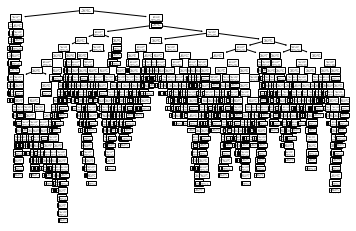

In [76]:
tree.plot_tree(clf) 